# Проект. Исследование стартапов

- Автор: Лапушкина Ирина
- Дата: 30.09.2025

## Введение

**Цель**:
провести исследовательский анализ данных о компаниях, привлекших венчурные инвестиции, чтобы выявить закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний.

**Задачи**:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Инжиниринг признаков.
3. Работа с выбросами и анализ.
4. Анализ динамики.
5. Итоговый вывод и рекомендации.

---

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

### 1.1. Вывод общей информации

In [1]:
#Загружаем библиотеку для анализа данных
import pandas as pd

#Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

#Загружаем библиотеку для расчета коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

Познакомимся с данными датасета `cb_investments`.

In [3]:
#Выведем информацию о датасете
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [4]:
#Выведем первые 20 столбцов датасета
invest.iloc[:5,:20]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14,0.0


In [5]:
#Выведем оставшиеся столбцы датасета
invest.iloc[:5,20:]

,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Посчитаем долю пропусков
invest.isna().mean()

name                    0.089457
homepage_url            0.152963
category_list           0.162394
 market                 0.162394
 funding_total_usd      0.089439
status                  0.113641
country_code            0.186558
state_code              0.444487
region                  0.186558
city                    0.202085
funding_rounds          0.089439
participants            0.438741
founded_at              0.289903
founded_month           0.291229
founded_quarter         0.291229
founded_year            0.289903
first_funding_at        0.089439
mid_funding_at          0.442148
last_funding_at         0.089439
seed                    0.089439
venture                 0.089439
equity_crowdfunding     0.089439
undisclosed             0.089439
convertible_note        0.089439
debt_financing          0.089439
angel                   0.089439
grant                   0.089439
private_equity          0.089439
post_ipo_equity         0.089439
post_ipo_debt           0.089439
secondary_

In [7]:
#Проверим строки, где не указано название компании
invest[invest['name'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4857 entries, 27212 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  0 non-null      object 
 1   homepage_url          1 non-null      object 
 2   category_list         1 non-null      object 
 3    market               1 non-null      object 
 4    funding_total_usd    1 non-null      object 
 5   status                1 non-null      object 
 6   country_code          0 non-null      object 
 7   state_code            0 non-null      object 
 8   region                0 non-null      object 
 9   city                  0 non-null      object 
 10  funding_rounds        1 non-null      float64
 11  participants          0 non-null      float64
 12  founded_at            1 non-null      object 
 13  founded_month         1 non-null      object 
 14  founded_quarter       1 non-null      object 
 15  founded_year    

Датасет `cb_investments` содержит 54294 строкии 40 столбцов. 
Данные соответствуют описанию.
Столбцы написаны в едином стиле, однако некоторые столбцы, такие как `market` и `funding_total_usd` содержат в названии лишние пробелы.

Все столбцы содержат пропуски. Однако, почти все строки, где не указано название компании, не содержат каких-либо значений и в остальных столбцах. Их можно удалить.

У некоторых столбцов указан невереный тип данных: 
- `funding_total_usd` - присвоен "object" из-за разделяющих разряды запятых. Должен быть "int64".
- `founded_at`, `first_funding_at`, `mid_funding_at`, `last_funding_at` - "object" нужно изменить на "datetime64"
- всем числовым столбцам присвоен тип данных "float64" из-за наличия пропусков. При необходимости, можно изменить на "int64".

Теперь познакомимся с данными датасета `cb_returns`.

In [8]:
#Выведем информацию о датасете
rtns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


In [9]:
#Выведем первые строки датасета
rtns.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Датасет `cb_retuns` содержит 15 строк и 14 стобцов. Названия написаны в едином стиле. Данные соответствуют описанию. Пропусков нет. Типы данных указаны верно.

### 1.2. Предобработка данных

Уберем лишние пробелы в названии столбцов датасета `cb_investments`.

In [10]:
for column in invest.columns:
    new_column=column.strip()
    invest = invest.rename(columns={column: new_column})
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3   market                45477 non-null  object 
 4   funding_total_usd     49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [11]:
#Удалим возможные пропуски в значениях столбца `market`
invest['market'] = invest['market'].str.strip()

Удалим полностью пустые строки.

In [12]:
invest = invest[invest.isna().all(axis=1)==False]
invest.info()
invest_start=invest

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3   market                45477 non-null  object 
 4   funding_total_usd     49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Уберем в столбце `funding_total_usd` выделение разрядов и приведем его к числовому типу.
Ошибки заменим на пропуски.

In [13]:
invest['funding_total_usd'] = pd.to_numeric(invest['funding_total_usd'].str.replace(',', ''), 
    errors='coerce')
invest['funding_total_usd'].dtype

dtype('float64')

Обработаем типы данных в столбцах, которые хранят значения даты и времени.

In [14]:
for column in invest[['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']]:
    invest[column]=pd.to_datetime(invest[column], errors='coerce')
invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  49437 non-null  object        
 1   homepage_url          45989 non-null  object        
 2   category_list         45477 non-null  object        
 3   market                45477 non-null  object        
 4   funding_total_usd     40907 non-null  float64       
 5   status                48124 non-null  object        
 6   country_code          44165 non-null  object        
 7   state_code            30161 non-null  object        
 8   region                44165 non-null  object        
 9   city                  43322 non-null  object        
 10  funding_rounds        49438 non-null  float64       
 11  participants          30473 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

В датасете `cb_returns` сделаем столбец `year` индексом всего датасета.

In [15]:
rtns.set_index('year', inplace=True)

Заменим пропуски в столбце `market` на заглушку.

In [16]:
invest['market']=invest['market'].fillna('no_info')

Заменим пропуски в столбце `funding_total_usd` суммой всех столбцов о финансировании.

In [17]:
#Определяем список колонок для суммы
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed',
                   'convertible_note', 'debt_financing', 'angel', 'grant',
                   'private_equity', 'post_ipo_equity', 'post_ipo_debt',
                   'secondary_market', 'product_crowdfunding']

# Создаем маску для пропущенных значений в 'funding_total_usd'
mask = invest['funding_total_usd'].isna()

# Вычисляем сумму по выбранным колонкам только для строк с пропусками
invest.loc[mask, 'funding_total_usd'] = invest.loc[mask, funding_columns].sum(axis=1)

In [18]:
#Удалим компании, у которых не было финансирования
invest = invest[invest['funding_total_usd']!=0].copy()
invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 49437
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  40906 non-null  object        
 1   homepage_url          38593 non-null  object        
 2   category_list         38404 non-null  object        
 3   market                40907 non-null  object        
 4   funding_total_usd     40907 non-null  float64       
 5   status                39802 non-null  object        
 6   country_code          37088 non-null  object        
 7   state_code            25619 non-null  object        
 8   region                37088 non-null  object        
 9   city                  36402 non-null  object        
 10  funding_rounds        40907 non-null  float64       
 11  participants          27331 non-null  float64       
 12  founded_at            32200 non-null  datetime64[ns]
 13  founded_month   

In [19]:
#Проверим наличие явных дубликатов
invest.duplicated().sum()

0

Явных дубликатов нет.

Заполним пропуски в значениях `mid_funding_at` серединой интервала между `first_funding_at` и `last_funding_at`.

In [20]:
# Создадим маску для пропущенных значений mid_funding_at
mask = invest['mid_funding_at'].isna()

# Вычислим среднее между first_funding_at и last_funding_at
mid_values = invest.loc[mask, 'first_funding_at'] + \
             (invest.loc[mask, 'last_funding_at'] - invest.loc[mask, 'first_funding_at']) / 2

# Заполним пропущенные значения
invest.loc[mask, 'mid_funding_at'] = mid_values

In [21]:
#Проверим долю оставшихся пропусков
invest.isna().mean()

name                    0.000024
homepage_url            0.056567
category_list           0.061188
market                  0.000000
funding_total_usd       0.000000
status                  0.027012
country_code            0.093358
state_code              0.373726
region                  0.093358
city                    0.110128
funding_rounds          0.000000
participants            0.331875
founded_at              0.212849
founded_month           0.214438
founded_quarter         0.214438
founded_year            0.212824
first_funding_at        0.000049
mid_funding_at          0.000024
last_funding_at         0.000000
seed                    0.000000
venture                 0.000000
equity_crowdfunding     0.000000
undisclosed             0.000000
convertible_note        0.000000
debt_financing          0.000000
angel                   0.000000
grant                   0.000000
private_equity          0.000000
post_ipo_equity         0.000000
post_ipo_debt           0.000000
secondary_

In [22]:
invest_start.shape[0]
invest.shape[0]
display(f'Было удалено {invest_start.shape[0]-invest.shape[0]} строка, что составляет {round((invest_start.shape[0]-invest.shape[0])/invest_start.shape[0]*100,2)}%')

'Было удалено 8531 строка, что составляет 17.26%'

Значительная доля пропусков осталась в нескольких столбцах. Однако, они не будут использоваться для дальнейшего анализа, поэтому можно их не трогать.

В ходе предобработки данных было призведено следующее:
- Удалены лишние пробелы в названии столбцов датасета `cb_investments`;
- Удалены пропуски в значениях столбца `market`;
- Удалены полностью пустые строки;
- В столбце `funding_total_usd` убрано выделение разрядов и значения приведены к числовому типу;
- Обработаны типы данных в столбцах, которые хранят значения даты и времени.
- Пропуски в столбце `funding_total_usd` заменены суммой всех столбцов о финансировании; 
- Удалены компании, у которых не было финансирования;
- Пропуски в значениях `mid_funding_at` заменены серединой интервала между `first_funding_at` и `last_funding_at`.

Как итог, была удалена 8531 строка, что составляет 17,26%.

## Шаг 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования

Разделите все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируйте соотношение этих групп, создав два графика:

* По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

In [23]:
#Разделим компании на группы по сроку финансирования
def classify_funding_rounds(row):
    duration=(row['last_funding_at']-row['first_funding_at']).days
    if row['funding_rounds']==1:
        return 'Единичное финансирование'
    elif row['funding_rounds']>1 and duration<=365:
        return 'Срок финансирования до года'
    elif row['funding_rounds']>1 and duration>365:
        return 'Срок финансирования более года' 

invest.loc[:,'funding_period']=invest.apply(classify_funding_rounds, axis=1)

In [24]:
#Посчитаем долю компаний в каждой группе
invest['funding_period'].value_counts(normalize=True).reset_index()

,index,funding_period
0,Единичное финансирование,0.589488
1,Срок финансирования более года,0.300477
2,Срок финансирования до года,0.110035


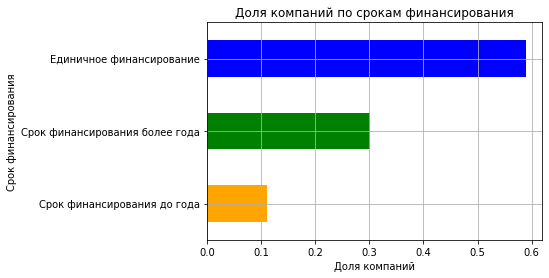

In [25]:
#Построим график
invest['funding_period'].value_counts(normalize=True, ascending=True).plot(kind='barh', color=['orange', 'green', 'blue'])

plt.title('Доля компаний по срокам финансирования')
plt.xlabel('Доля компаний')
plt.ylabel('Срок финансирования')
plt.grid()

In [26]:
#Рассчитаем общую сумму финансирования
total_funding = invest['funding_total_usd'].sum()

#Сумма финансирования по группам
grouped = invest.groupby('funding_period')['funding_total_usd'].sum()

#Выведем долю
share = grouped / total_funding
display(share.sort_values(ascending=False))

funding_period
Срок финансирования более года    0.618664
Единичное финансирование          0.306182
Срок финансирования до года       0.075101
Name: funding_total_usd, dtype: float64

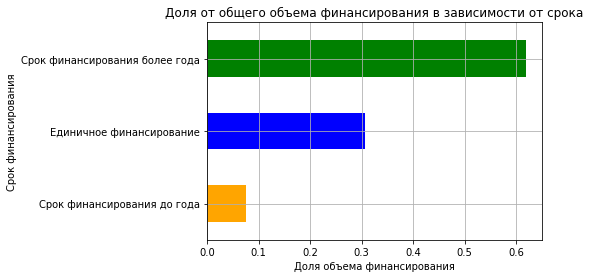

In [27]:
#Построим график
share.sort_values(ascending=True).plot(kind='barh', color=['orange', 'blue', 'green'])

plt.title('Доля от общего объема финансирования в зависимости от срока')
plt.xlabel('Доля объема финансирования')
plt.ylabel('Срок финансирования')
plt.grid()

58,9% компаний получили единичное финансирование. Однако, эти компании получили лишь 30,6% от общего объема финансирования. 

62% от общего объема финансов получили компании, у которых срок финансирования составил больше года. Таких компаний всего 30%.

Меньше всего по количеству и объему финансирования составили компании со сроком финансирования до года (11% и 7,5% соответственно).

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

In [28]:
#Рассчитаем, сколько компаний находится в каждом сегменте
markets = invest['market'].value_counts().reset_index()
display(markets)

,index,market
0,Software,4812
1,Biotechnology,3590
2,no_info,2503
3,Mobile,2344
4,E-Commerce,1866
...,...,...
390,Natural Language Processing,1
391,Virtual Currency,1
392,Embedded Hardware and Software,1
393,Chat,1


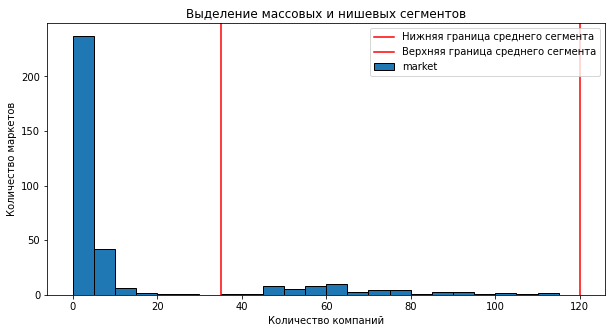

In [29]:
#Построим гисторгамму распределения
plt.figure(figsize=(10,5))
markets['market'].plot(kind='hist', bins=range(0, 125,5), edgecolor='black')

plt.ylabel('Количество маркетов')
plt.xlabel('Количество компаний')
plt.title('Выделение массовых и нишевых сегментов')
plt.axvline(35, color='red', label="Нижняя граница среднего сегмента")
plt.axvline(120, color='red', label="Верхняя граница среднего сегмента")
plt.legend()

In [30]:
#Разделим сегменты на группы исходя из их размера
def classify_markets(row):
    if row['market']>120:
        return 'mass'
    elif row['market']>=35:
        return 'mid'
    elif row['market']<35:
        return 'nich'
    
markets['segment']=markets.apply(classify_markets, axis=1)
markets['segment'].value_counts()

nich    289
mid      57
mass     49
Name: segment, dtype: int64

Оставьте в столбце `market` только массовые сегменты. Для остальных сегментов замените значения на заглушки — `niche` для нишевых и `mid` для средних.

Дальнейшие исследования выполняйте с учётом этой замены. Индивидуальные сегменты внутри средней и нишевой групп рассматривать не нужно — они объединяются в два общих сегмента.


In [31]:
#Объединим таблицы `invest` и `markets`
invest = invest.merge(markets, left_on='market', right_on='index', how='left' )

#Поставим заглушки на нишевые и средние сегменты
def market_change(row):
    if row['segment']=='nich':
        return 'nich'
    elif row['segment']=='mid':
        return 'mid'
    elif row['segment']=='mass':
        return row['market_x']
    
invest['market_x']=invest.apply(market_change, axis=1)

#Удалим ненужные более столбцы и переименуем `market_x` обратно в `market
invest.drop(['market_y', 'index', 'segment'], axis=1, inplace=True)
invest.rename(columns={'market_x':'market'}, inplace=True)

Всего в данных содержится 395 сегментов. 
После разделения на группы получилось, что к массовым относится 49 сегментов, к средним 57 и к нишевым 289.

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

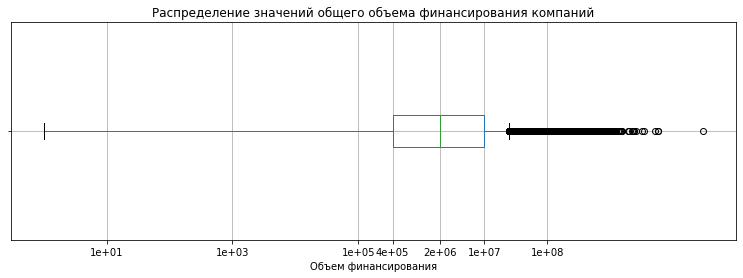

In [32]:
#Построим график с распределением значений столбца `funding_total_usd`
plt.figure(figsize=(13,4))

invest.boxplot(column='funding_total_usd', vert=False)
plt.title('Распределение значений общего объема финансирования компаний')
plt.xlabel('Объем финансирования')

#Чтобы значения были читаемыми на графике, переведем их в логарифмы
plt.xscale('log')
ax=plt.gca()
xticks=[10,1000,100000,350000,2000000,10000000,100000000]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
plt.tick_params(labelleft=False)

In [33]:
#Вычислим медиану столбца `funding_total_usd`
invest['funding_total_usd'].median()

2000000.0

Определите компании с аномальным объёмом общего финансирования — используйте метод IQR отдельно по каждому сегменту. Напомним, что все нишевые сегменты должны быть объединены в одну группу, а средние — в другую.

Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

In [34]:
#Напишем функцию, которая посчитает нижнюю и верхнюю границу интервалов для каждого сегмента.
def iqr_calc(value):
    q1 = invest[invest['market'] == value]['funding_total_usd'].quantile(0.25)
    q3 = invest[invest['market'] == value]['funding_total_usd'].quantile(0.75)
    iqr = q3 - q1
    lower_b = q1 - 1.5 * iqr
    upper_b = q3 + 1.5 * iqr
    return pd.Series({'lower_bound': lower_b, 'upper_bound': upper_b})

#Выделим уникальные сегменты
unique_markets = invest['market'].drop_duplicates()

#Применим функцию — индексы будут названиями сегментов
bounds_df = unique_markets.apply(iqr_calc).sort_values(by='upper_bound', ascending=False)
bounds_df.index = unique_markets.values
display(bounds_df)

,lower_bound,upper_bound
Education,-3.811321e+07,7.506792e+07
no_info,-3.854493e+07,6.824155e+07
mid,-3.842500e+07,6.737500e+07
Social Media,-3.519614e+07,5.987756e+07
Hardware + Software,-3.295000e+07,5.977000e+07
Biotechnology,-2.929751e+07,5.282918e+07
Hospitality,-2.000000e+07,3.600000e+07
Enterprise Software,-1.915875e+07,3.463125e+07
Manufacturing,-1.863233e+07,3.305388e+07
Finance,-1.893205e+07,3.288675e+07


In [35]:
#Добавим столбец с признаком аномального финансирования
invest = invest.merge(bounds_df.reset_index(), left_on='market', right_on='index', how='left')
def abn_financing(value):
    if value['funding_total_usd']>value['upper_bound']:
        return 1
    else:
        return 0
invest['abn_fin']=invest.apply(abn_financing, axis=1)

In [36]:
#Выведем долю компаний с аномальным финансированием по сегментам
invest.groupby('market')['abn_fin'].mean().sort_values(ascending=False).head(10)

market
Semiconductors      0.382231
Cloud Computing     0.322368
Technology          0.315126
Web Hosting         0.304245
Clean Technology    0.299153
Big Data            0.293333
Health Care         0.273418
Entertainment       0.260000
Video               0.234043
Advertising         0.217706
Name: abn_fin, dtype: float64

Самая большая доля компаний, которая получила аномальное финансирование, находится в сегменте "Semicondactors" - 38%. Также больше 20% компаний с аномальным финансированием наблюдается в сегментах `Cloud Computing`, `Technology`, `Web Hosting`, `Clean Technology`, `Big Data`, `Health Care`, `Entertainment`, `Video`, `Advertising`.

### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [37]:
#Напишем функцию для сравнения динамики инвестиций по месяцам за разные годы
def get_monthly_investment_counts(data, year, column, title):
    filtered_data = data[data[column].dt.year == year].copy()
    filtered_data['month'] = filtered_data[column].dt.month
    result = filtered_data.groupby('month').size()
    display(f"Кол-во компаний, получивших {title} финансирование за {year}:")
    return result

result_2014_f = get_monthly_investment_counts(invest, 2014, 'first_funding_at', 'первое')
display(result_2014_f)

result_2013_f = get_monthly_investment_counts(invest, 2013, 'first_funding_at','первое')
display(result_2013_f)

result_2014_l = get_monthly_investment_counts(invest, 2014, 'last_funding_at', 'последнее')
display(result_2014_l)

result_2013_l = get_monthly_investment_counts(invest, 2013, 'last_funding_at', 'последнее')
display(result_2013_l)

'Кол-во компаний, получивших первое финансирование за 2014:'

month
1     810
2     635
3     661
4     593
5     549
6     669
7     671
8     525
9     538
10    492
11    311
12     23
dtype: int64

'Кол-во компаний, получивших первое финансирование за 2013:'

month
1     696
2     446
3     536
4     505
5     505
6     591
7     596
8     640
9     726
10    657
11    630
12    648
dtype: int64

'Кол-во компаний, получивших последнее финансирование за 2014:'

month
1     1178
2      947
3     1072
4     1077
5     1036
6     1229
7     1254
8     1064
9     1135
10    1139
11     732
12      52
dtype: int64

'Кол-во компаний, получивших последнее финансирование за 2013:'

month
1     653
2     472
3     578
4     564
5     611
6     747
7     727
8     766
9     936
10    899
11    818
12    916
dtype: int64

Если сравнить данные о количестве компаний, которые получили первое и последнее финансировании за 2014 год и за 2013 по месяцам, то можно предположить, что за 2014 предоставлены неполные данные. А именно не хватает данных за декабрь.

In [38]:
#Найдем года, когда было более 50 раундов финансирования
invest['mid_year'] = invest[invest['abn_fin']==0]['mid_funding_at'].dt.year
years = invest.groupby('mid_year')['funding_rounds'].sum()
years_50_r=years[years.values>=50]
display(years_50_r)

mid_year
1999.0       59.0
2000.0      134.0
2001.0       73.0
2002.0      109.0
2003.0      161.0
2004.0      205.0
2005.0      961.0
2006.0     1831.0
2007.0     2791.0
2008.0     3428.0
2009.0     4570.0
2010.0     6063.0
2011.0     7629.0
2012.0     9856.0
2013.0    12980.0
2014.0     7312.0
Name: funding_rounds, dtype: float64

In [39]:
#Оставим компании, которые получали финансирование в нужные годы
invest_filtered = invest[invest['mid_year'].isin(years_50_r.index)].copy()
invest_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35841 entries, 1 to 40906
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  35840 non-null  object        
 1   homepage_url          33676 non-null  object        
 2   category_list         33401 non-null  object        
 3   market                35841 non-null  object        
 4   funding_total_usd     35841 non-null  float64       
 5   status                34853 non-null  object        
 6   country_code          32246 non-null  object        
 7   state_code            21904 non-null  object        
 8   region                32246 non-null  object        
 9   city                  31632 non-null  object        
 10  funding_rounds        35841 non-null  float64       
 11  participants          23147 non-null  float64       
 12  founded_at            27929 non-null  datetime64[ns]
 13  founded_month   

После фильтрации осталось 35841 компания.

### 3.3. Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

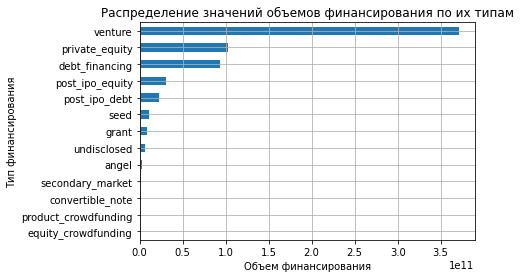

In [40]:
#Построим график, который покажет объемы финансирования по их типам
invest[['seed', 'venture', 'equity_crowdfunding', 
              'undisclosed', 'convertible_note', 'debt_financing', 
              'angel', 'grant', 'private_equity', 'post_ipo_equity', 
              'post_ipo_debt', 'secondary_market', 'product_crowdfunding']].sum().sort_values(
    ascending=True).plot(kind='barh')
plt.title('Распределение значений объемов финансирования по их типам')
plt.xlabel('Объем финансирования')
plt.ylabel('Тип финансирования')
plt.grid()

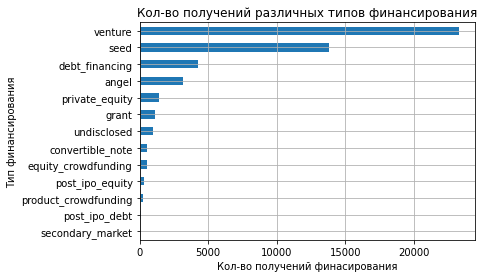

In [41]:
#Построим график, который покажет популярность разных типов финансирования
counts=(invest[['seed', 'venture', 'equity_crowdfunding', 
              'undisclosed', 'convertible_note', 'debt_financing', 
              'angel', 'grant', 'private_equity', 'post_ipo_equity', 
              'post_ipo_debt', 'secondary_market', 'product_crowdfunding']]!=0).sum()
counts.sort_values(ascending=True).plot(kind='barh')
plt.title('Кол-во получений различных типов финансирования')
plt.xlabel('Кол-во получений финасирования')
plt.ylabel('Тип финансирования')
plt.grid()

Лидером по кол-ву получений и объему в деньгах являются венчурные инвестиции.

Интересная ситуация с частными инвестициями и инвестициями на посевной стадии. Первые занимают второе место по объему финансирования, но лишь 5 по кол-ву получений. И наоборот, инвестиции на посевной стадии получают часто (2 место), но в объеме это только 6 место.

Постройте график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета. Инвестиции после IPO получают еще реже (10 место), а по объему они занимают 4 место.

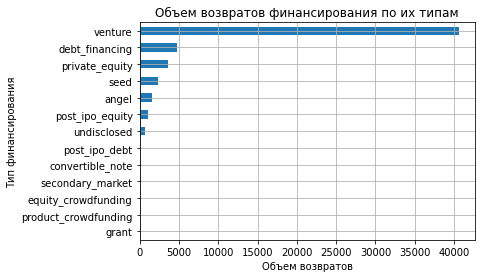

In [42]:
#Построим график суммарных объёмов возвратов от разных типов финансирования
rtns.sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Объем возвратов финансирования по их типам')
plt.xlabel('Объем возвратов')
plt.ylabel('Тип финансирования')
plt.grid()

По возвратам инвестиций так же лидирует сегмент `venture`. Кроме того, в топе находятся сегменты `debt_financing`, `private_equity`, `seed` и `angel`.

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.

На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.

На основе полученных данных ответьте на вопросы:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

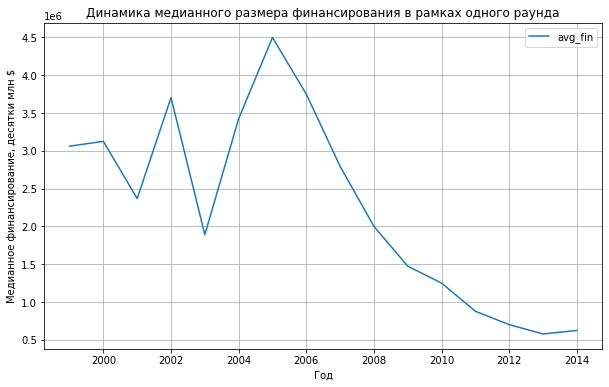

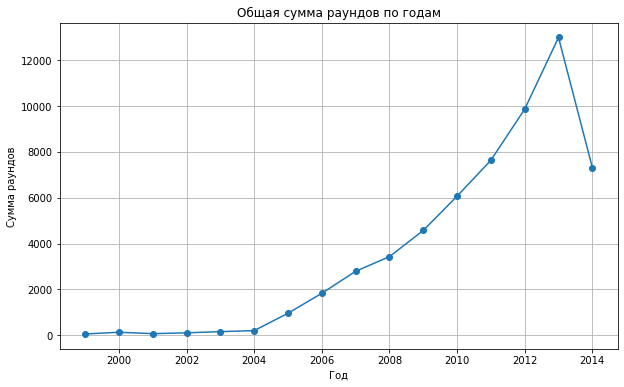

In [43]:
#Рассчитаем для каждой компании средний объем одного раунда финансирования
invest_filtered['avg_fin']=invest_filtered['funding_total_usd']/invest_filtered['funding_rounds']

#Посчитаем медиану по годам
med_per_year = invest_filtered.groupby('mid_year')['avg_fin'].median().reset_index()

#Построим график медианного размера финансирования в рамках одного раунда
med_per_year.plot(kind='line', x='mid_year', y='avg_fin', figsize=(10,6))
plt.title('Динамика медианного размера финансирования в рамках одного раунда')
plt.xlabel('Год')
plt.ylabel('Медианное финансирование, десятки млн $')
plt.grid()

#Посчитаем суммарное кол-во раундов в каждом году
sum_rounds_per_year = invest_filtered.groupby('mid_year')['funding_rounds'].sum().reset_index()

#Построим график
plt.figure(figsize=(10,6))
plt.plot(sum_rounds_per_year['mid_year'], sum_rounds_per_year['funding_rounds'], marker='o')  # или 'total_rounds'
plt.title('Общая сумма раундов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма раундов')
plt.grid()
plt.show()

Максимальный объем финансирования в рамках одного раунда был в 2005 году, далее наметилась тенденция на уменьшение финансирования на раунд.

На ряду с этим, кол-во раундов в каждом году, начиная с 2004, наоборот, увеличивается. За исключение 2014 года - здесь резко уменьшилось кол-во раундов, но при этом немного увеличился объем финансирования на раунд.

Получается, можно предположить, что у объема финансирования в рамках одного раунда и кол-ва раундов обратная зависимость.

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

In [44]:
#Посчитаем размер общего финансирования для каждого сегмента по годам 
total_financing=invest_filtered[~invest_filtered['market'].isin(['mid', 
    'nich', 'no_info'])].groupby(['mid_year', 'market'])['funding_total_usd'].sum()
display(total_financing)

mid_year  market     
1999.0    Advertising       350000.0
          Analytics       10774916.0
          Consulting        115200.0
          Curated Web      9250000.0
          E-Commerce      39400000.0
                            ...     
2014.0    Startups        41501837.0
          Technology     122018937.0
          Travel          78920274.0
          Video           40937714.0
          Web Hosting     30306158.0
Name: funding_total_usd, Length: 583, dtype: float64

In [45]:
#Оставим только те сегменты, которые показывали рост в 2014 году по сравнению с 2013
invest_fil_2014=total_financing.xs(2014, level='mid_year').reset_index()
invest_fil_2013=total_financing.xs(2013, level='mid_year').reset_index()
inv_merged=invest_fil_2014.merge(invest_fil_2013, on='market')
market_fil=inv_merged[inv_merged['funding_total_usd_x']>inv_merged['funding_total_usd_y']]
display(market_fil)

,market,funding_total_usd_x,funding_total_usd_y
2,Apps,66237730.0,28868621.0
14,Entertainment,46735558.0,32281405.0
22,Internet,117830756.0,69732096.0
23,Manufacturing,416332314.0,393936634.0
25,Medical,155236064.0,64469424.0
31,Nonprofits,72341299.0,71155457.0
32,Photography,58297850.0,50033847.0
34,Real Estate,115567364.0,106807655.0
35,SaaS,66807766.0,62676613.0
42,Sports,41456511.0,36208524.0


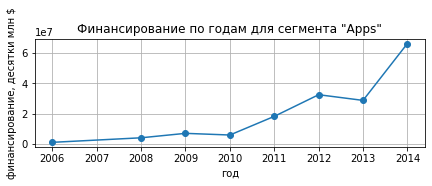

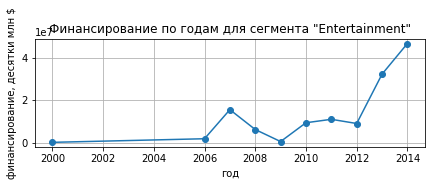

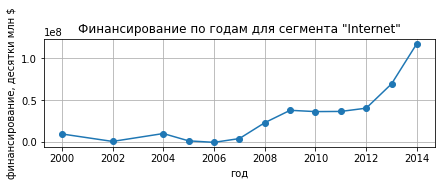

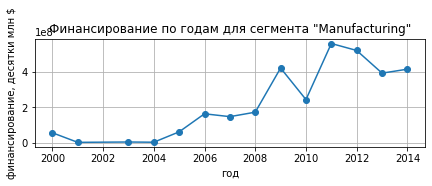

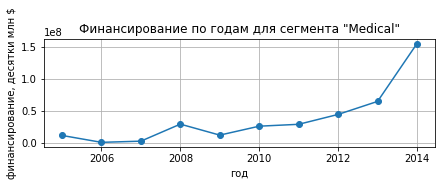

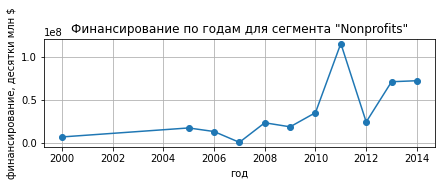

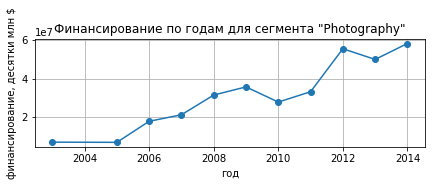

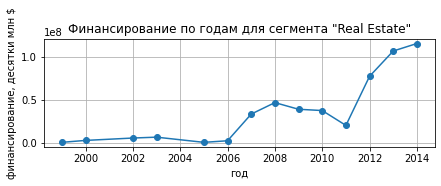

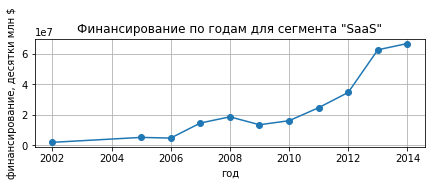

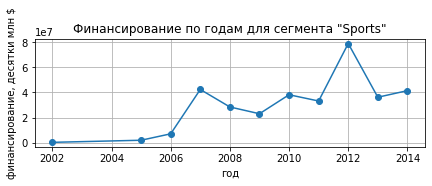

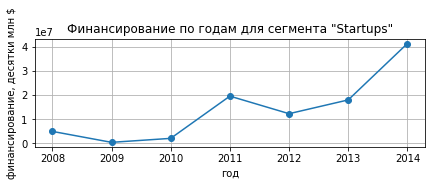

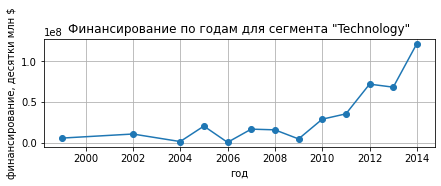

In [46]:
total_financing_new = total_financing.reset_index()
total_fin_graph = total_financing_new[total_financing_new['market'].isin(market_fil['market'])]

for market_name, group in total_fin_graph.groupby('market'):
    plt.figure(figsize=(7,2))
    plt.plot(group['mid_year'], group['funding_total_usd'], marker='o')
    plt.title(f'Финансирование по годам для сегмента "{market_name}"')
    plt.xlabel('год')
    plt.ylabel('финансирование, десятки млн $')
    plt.grid()
    plt.show()

Сегменты Apps, Internet, Medical, Photografy, Saas, Startups, Technology показывают наиболее быстрый, но при этом стабильный рост, без сильных спадов.

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например `1e-60`. Это поможет избежать деления на ноль.

In [47]:
#Посчитаем объемы финансирования для разных каналов по каждому году 
invest_sum=invest_filtered[['mid_year',
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
    'convertible_note', 'debt_financing', 'angel', 'grant', 
    'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
    'secondary_market', 'product_crowdfunding'
]].groupby('mid_year').sum()

#Посчитаем доли возвратов
rtns2=rtns*1000000
rtns_share=((rtns2.T/(invest_sum.T+1e-60)*100).round(2)).T
rtns_share_fil = rtns_share[rtns_share.index!=1999]
subset=rtns_share_fil.where((rtns_share_fil <= 100) & (rtns_share_fil > 0), np.nan)
display(subset)

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
2000.0,99.65,13.24,NaN,29.07,NaN,NaN,26.70,NaN,NaN,27.11,NaN,2.59,NaN
2001.0,10.91,8.25,NaN,48.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,70.37,54.26,NaN,36.91,NaN,23.90,NaN,NaN,3.25,NaN,NaN,NaN,NaN
2003.0,63.06,40.26,NaN,91.44,NaN,18.02,8.63,NaN,NaN,NaN,NaN,NaN,NaN
2004.0,58.05,59.03,NaN,33.61,NaN,64.78,99.63,NaN,8.76,NaN,NaN,NaN,NaN
2005.0,62.33,54.87,NaN,34.63,NaN,47.48,50.99,NaN,8.00,73.19,NaN,NaN,NaN
2006.0,88.19,36.55,20.36,NaN,15.43,NaN,65.28,NaN,10.02,NaN,NaN,NaN,NaN
2007.0,33.98,32.58,NaN,36.18,41.19,61.55,78.06,NaN,74.30,NaN,NaN,NaN,NaN
2008.0,29.56,24.09,NaN,32.44,6.49,NaN,39.79,NaN,NaN,NaN,NaN,NaN,NaN
2009.0,54.87,18.22,8.78,45.90,5.74,45.33,54.75,NaN,77.04,NaN,NaN,0.62,6.60


Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

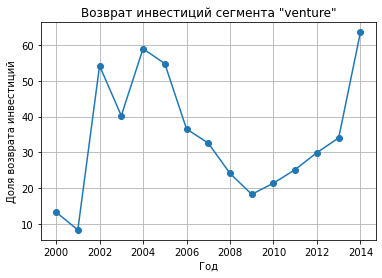

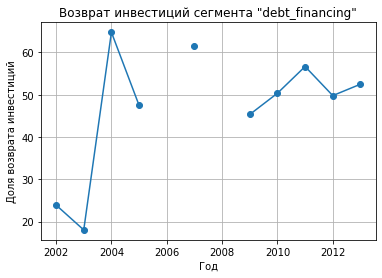

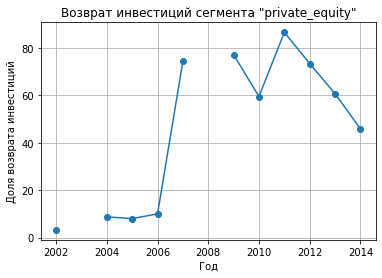

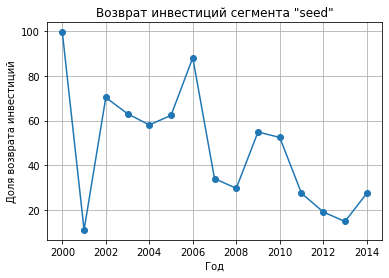

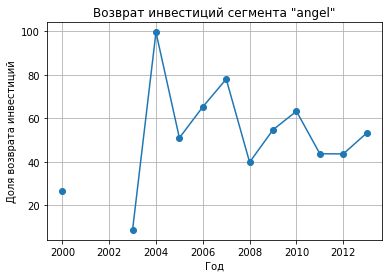

In [48]:
#Построим график для ряда видов финансирования с долей возврата инвестиций
columns = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

for col in columns:
    plt.figure()
    plt.plot(subset.index, subset[col], marker='o')
    plt.title(f'Возврат инвестиций сегмента "{col}"')
    plt.xlabel("Год")
    plt.ylabel("Доля возврата инвестиций")
    plt.grid(True)
    plt.show()

В сегменте `venture` стабильно возвращается от 20% до 60%, а также в сегменте `angel`, начиная с 2005 года стабильно возвращается от 40 до 80%. 


## Шаг 5. Итоговый вывод и рекомендации

По итогу анализа в качестве сегментов для инвестирования можно посоветовать выбрать `Apps`, `Internet`, `Medical`, `Photografy`, `Saas`, `Startups` и `Technology`. Они показывают наиболее быстрый, но при этом стабильный рост, без сильных спадов.

Среди типов инвестирования следует выбрать `venture` или `angel`. У них наиболее стабильный процент возвратов инвестиций: от 20% до 60% и от 40% до 80%, соответственно.

В ходе анализа были проведены:
1. Предобработка исходных данных, включающая:
    - изменение типов столбцов
    - заполнение пропусков
    - удаление информации о компаниях, не получавших финансирования
    
   Как итог, была удалена 8531 строка, что составляет 17,26% от всех данных.   


2. Инжиниринг признаков
3. Обработка выбросов и анализ
4. Анализ динамики

В результате можно сформулировать следующие выводы:
- Самое популярное финансирование - единичное, его получило 59% компаний, однако по объему финансирования лидирует финансирование со сроком более года - оно составляет 62% от общих инвестиций
- Типичный объем финансирования находится в диапазоне от 350 000 до 10 000 000 долларов. Медианный объем финансирования составляет 2 000 000 долларов.
- Самая большая доля компаний, которая получила аномальное финансирование, находится в сегменте "Semicondactors" - 38%. Также больше 20% компаний с аномальным финансированием наблюдается в сегментах Cloud Computing, Technology, Web Hosting, Clean Technology, Big Data, Health Care, Entertainment, Video, Advertising.
- Лидером по кол-ву получений и объему в деньгах являются венчурные инвестиции.
- Интересная ситуация с частными инвестициями и инвестициями на посевной стадии. Первые занимают второе место по объему финансирования, но лишь 5 по кол-ву получений. И наоборот, инвестиции на посевной стадии получают часто (2 место), но в объеме это только 6 место.
- Предположительно, между объемом финансирования в рамках одного раунда и количеством раундов наблюдается обратная зависимость. С 2005 года падает объем финансирования на раунд и растет кол-во раундов